In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

titanic = sns.load_dataset('titanic')

In [2]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


전체 데이터에서 결측치 확인

In [3]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

- age, embarked, deck, embark_town만 결측치 존재
- age 제외 모두 범주형 자료
- age만 연속형 자료

# AGE 변수 결측치 변환 & 통계량

<Axes: xlabel='age', ylabel='Count'>

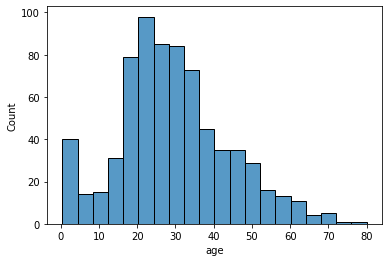

In [4]:
sns.histplot(x=titanic['age'])

- 가장 많은 연령대는 20-30대

In [5]:
mean_age = titanic['age'].mean()
mean_age

29.69911764705882

In [6]:
median_age = titanic['age'].median()
median_age

28.0

In [7]:
titanic_0 = titanic['age'].fillna(0)
titanic_0.isna().sum()

0

In [9]:
titanic_mean = titanic['age'].fillna(30)
titanic_mean.isna().sum()

0

In [10]:
titanic_median = titanic['age'].fillna(28)
titanic_median.isna().sum()

0

- titanic_0는 결측치 값을 0로 변환
- titanic_mean은 결측치 값을 평균(약30)으로 변환
- titanic_median은 결측치 값을 중앙값(28)로 변환

# 결측치 변환 안한 AGE 데이터 통계

<Axes: ylabel='age'>

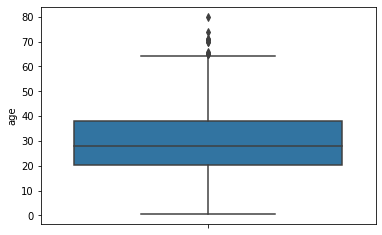

In [11]:
sns.boxplot(data=titanic,y='age')

결측치값 변환 없는 데이터를 가진 그래프

In [12]:
Q1 = titanic['age'].quantile(0.25)
Q1

20.125

In [13]:
Q3 = titanic['age'].quantile(0.75)
Q3

38.0

In [14]:
IQR = Q3-Q1
IQR

17.875

In [15]:
#아래 하한선
Q1 - 1.5*IQR

-6.6875

In [16]:
#위의 상한선
Q3 + 1.5*IQR

64.8125

In [17]:
np.where((titanic['age'] <-6.6875)| (titanic['age']>64.8125))

(array([ 33,  54,  96, 116, 280, 456, 493, 630, 672, 745, 851]),)

결측치를 변환하지 않은 데이터로 통계를 냈을 때 나오는 결과
- Q1 : 20.125
- Q3 : 38.0
- IQR = 17.875
- 아래 하한선 : -6.6875
- 위의 상한선 : 64.8125
- 이상치 값의 개수 : 11

# 결측치 0으로 변환한 AGE 데이터 통계

<Axes: >

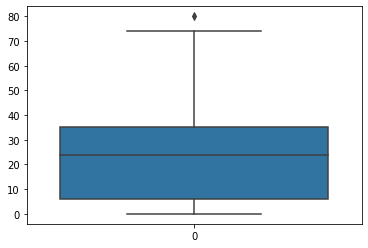

In [18]:
sns.boxplot(data=titanic_0)

In [19]:
Q1 = titanic_0.quantile(0.25)
Q1

6.0

In [20]:
Q3 = titanic_0.quantile(0.75)
Q3

35.0

In [21]:
IQR = Q3-Q1
IQR

29.0

In [22]:
#아래 하한선
Q1 - 1.5*IQR

-37.5

In [23]:
#위의 상한선
Q3 + 1.5*IQR

78.5

In [24]:
np.where((titanic_0 <-37.5)| (titanic_0>78.5))

(array([630]),)

결측치를 0으로 변환한 데이터로 통계를 냈을 때 나오는 결과
- Q1 : 6
- Q3 : 35
- IQR = 29
- 아래 하한선 : -37.5
- 위의 상한선 : 78.5
- 이상치 값의 개수 : 1

# 결측치 평균으로 변환한 AGE 데이터 통계

<Axes: >

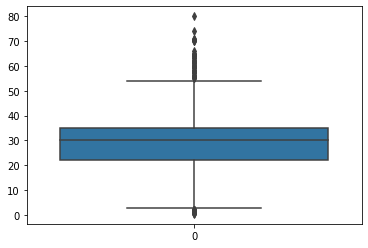

In [25]:
sns.boxplot(data=titanic_mean)

In [26]:
Q1 = titanic_mean.quantile(0.25)
Q1

22.0

In [27]:
Q3 = titanic_mean.quantile(0.75)
Q3

35.0

In [28]:
IQR = Q3-Q1
IQR

13.0

In [29]:
#아래 하한선
Q1 - 1.5*IQR

2.5

In [30]:
#위의 상한선
Q3 + 1.5*IQR

54.5

In [31]:
np.where((titanic_mean <2.5)| (titanic_mean>54.5))

(array([  7,  11,  15,  16,  33,  54,  78,  94,  96, 116, 119, 152, 164,
        170, 172, 174, 183, 195, 205, 232, 252, 268, 275, 280, 297, 305,
        326, 340, 366, 381, 386, 438, 456, 467, 469, 479, 483, 487, 492,
        493, 530, 545, 555, 570, 587, 625, 626, 630, 642, 644, 647, 659,
        672, 684, 694, 745, 755, 772, 788, 803, 824, 827, 829, 831, 851,
        879]),)

결측치를 평균으로 변환한 데이터로 통계를 냈을 때 나오는 결과
- Q1 : 22
- Q3 : 35
- IQR = 13
- 아래 하한선 : 2.5
- 위의 상한선 : 54.5
- 이상치 값의 개수 : 66

# 결측치 중앙값으로 변환한 AGE 데이터 통계

<Axes: >

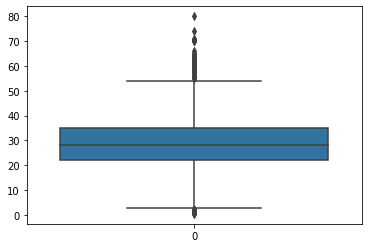

In [32]:
sns.boxplot(data=titanic_median)

In [33]:
Q1 = titanic_median.quantile(0.25)
Q1

22.0

In [34]:
Q3 = titanic_median.quantile(0.75)
Q3

35.0

In [35]:
IQR = Q3-Q1
IQR

13.0

In [36]:
#아래 하한선
Q1 - 1.5*IQR

2.5

In [37]:
#위의 상한선
Q3 + 1.5*IQR

54.5

In [38]:
np.where((titanic_median <2.5)| (titanic_median>54.5))

(array([  7,  11,  15,  16,  33,  54,  78,  94,  96, 116, 119, 152, 164,
        170, 172, 174, 183, 195, 205, 232, 252, 268, 275, 280, 297, 305,
        326, 340, 366, 381, 386, 438, 456, 467, 469, 479, 483, 487, 492,
        493, 530, 545, 555, 570, 587, 625, 626, 630, 642, 644, 647, 659,
        672, 684, 694, 745, 755, 772, 788, 803, 824, 827, 829, 831, 851,
        879]),)

결측치를 중앙값으로 변환한 데이터로 통계를 냈을 때 나오는 결과
- Q1 : 22
- Q3 : 35
- IQR = 13
- 아래 하한선 : 2.5
- 위의 상한선 : 54.5
- 이상치 값의 개수 : 66

-> 평균으로 변환했을 떄와 같은 데이터를 보여줌

# 결측치 없앤 AGE 데이터 통계

In [39]:
titanic_drop = titanic.dropna(subset  = ['age']) 
titanic_drop['age'].isna().sum()

0

In [40]:
titanic_drop['age'].count()

714

In [41]:
Q1 = titanic_drop['age'].quantile(0.25)
Q1

20.125

In [42]:
Q3 = titanic_drop['age'].quantile(0.75)
Q3

38.0

In [43]:
IQR = Q3-Q1
IQR

17.875

In [44]:
#아래 하한선
Q1 - 1.5*IQR

-6.6875

In [45]:
#위의 상한선
Q3 + 1.5*IQR

64.8125

In [47]:
np.where((titanic_drop['age'] <-6.6875)| (titanic['age']>64.8125))

(array([ 33,  54,  96, 116, 280, 456, 493, 630, 672, 745, 851]),)

결측치를 모두 제거한 데이터로 통계를 냈을 때 나오는 결과
- Q1 : 20.125
- Q3 : 38.0
- IQR = 17.825
- 아래 하한선 : -6.6875
- 위의 상한선 : 64.8125
- 이상치 값의 개수 : 11

-> 결측치에 대한 데이터처리를 하지 않은 원본 데이터와 동일한 통계량을 보여준다.

In [48]:
titanic['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [49]:
titanic_0.describe()

count    891.000000
mean      23.799293
std       17.596074
min        0.000000
25%        6.000000
50%       24.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64

In [50]:
titanic_mean.describe()

count    891.000000
mean      29.758889
std       13.002570
min        0.420000
25%       22.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64

In [51]:
titanic_median.describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64

In [52]:
titanic_drop['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

이상치가 가장 많이 나온 데이터는 결측치를 평균값과 중앙값으로 바꿨을 때이고, 가장 적게 나온 데이터는 결측치를 0으로 변환한 데이터이다.

# FARE 통계량

<Axes: xlabel='fare', ylabel='Count'>

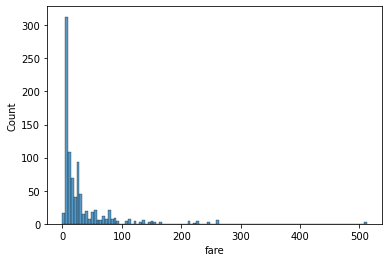

In [53]:
sns.histplot(x=titanic['fare'])

<Axes: ylabel='fare'>

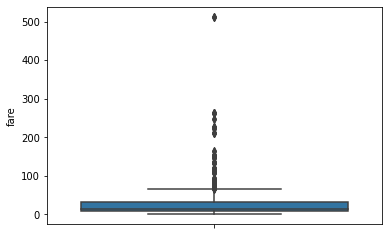

In [54]:
sns.boxplot(data=titanic,y='fare')

In [55]:
Q1 = titanic['fare'].quantile(0.25)
Q1

7.9104

In [56]:
Q3 = titanic['fare'].quantile(0.75)
Q3

31.0

In [57]:
IQR = Q3-Q1
IQR

23.0896

In [58]:
#아래 하한선
Q1 - 1.5*IQR

-26.724

In [59]:
#위의 상한선
Q3 + 1.5*IQR

65.6344

In [60]:
np.where((titanic['fare'] <-26.724)| (titanic['fare']>65.6344))

(array([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102, 118, 120, 124,
        139, 151, 159, 180, 195, 201, 215, 218, 224, 230, 245, 256, 257,
        258, 262, 268, 269, 275, 290, 291, 297, 299, 305, 306, 307, 310,
        311, 318, 319, 324, 325, 332, 334, 336, 337, 341, 366, 369, 373,
        375, 377, 380, 385, 390, 393, 412, 435, 438, 445, 453, 484, 486,
        496, 498, 504, 505, 520, 527, 537, 540, 544, 550, 557, 558, 581,
        585, 587, 591, 609, 627, 641, 645, 655, 659, 660, 665, 679, 681,
        689, 698, 700, 708, 716, 730, 737, 741, 742, 745, 759, 763, 765,
        779, 789, 792, 802, 820, 829, 835, 846, 849, 856, 863, 879]),)

In [61]:
titanic['fare'] = np.where((titanic['fare'] <-26.724)| (titanic['fare']>65.6344), np.nan, titanic['fare'])

In [62]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare           116
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [63]:
titanic['fare'].describe()

count    775.000000
mean      17.822091
std       13.578085
min        0.000000
25%        7.895800
50%       13.000000
75%       26.000000
max       65.000000
Name: fare, dtype: float64

통계 결과
- Q1 : 7.91
- Q3 : 31.0
- IQR = 23.0896
- 아래 하한선 : -26.724
- 위의 상한선 : 65.6344
- 이상치 값의 개수 : 116